**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [3]:
df = pd.DataFrame(adult)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [4]:
df["workclass"] = preprocessing.LabelEncoder().fit_transform(df["workclass"])
df["marital-status"] = preprocessing.LabelEncoder().fit_transform(df["marital-status"])
df["occupation"] = preprocessing.LabelEncoder().fit_transform(df["occupation"])
df["relationship"] = preprocessing.LabelEncoder().fit_transform(df["relationship"])
df["race"] = preprocessing.LabelEncoder().fit_transform(df["race"])
df["sex"] = preprocessing.LabelEncoder().fit_transform(df["sex"])
df["income"] = preprocessing.LabelEncoder().fit_transform(df["income"])
df["native-country"] = preprocessing.LabelEncoder().fit_transform(df["native-country"])


/Users/alexandertam/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Apply the functions you just wrote and append the results to the dataframe

**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

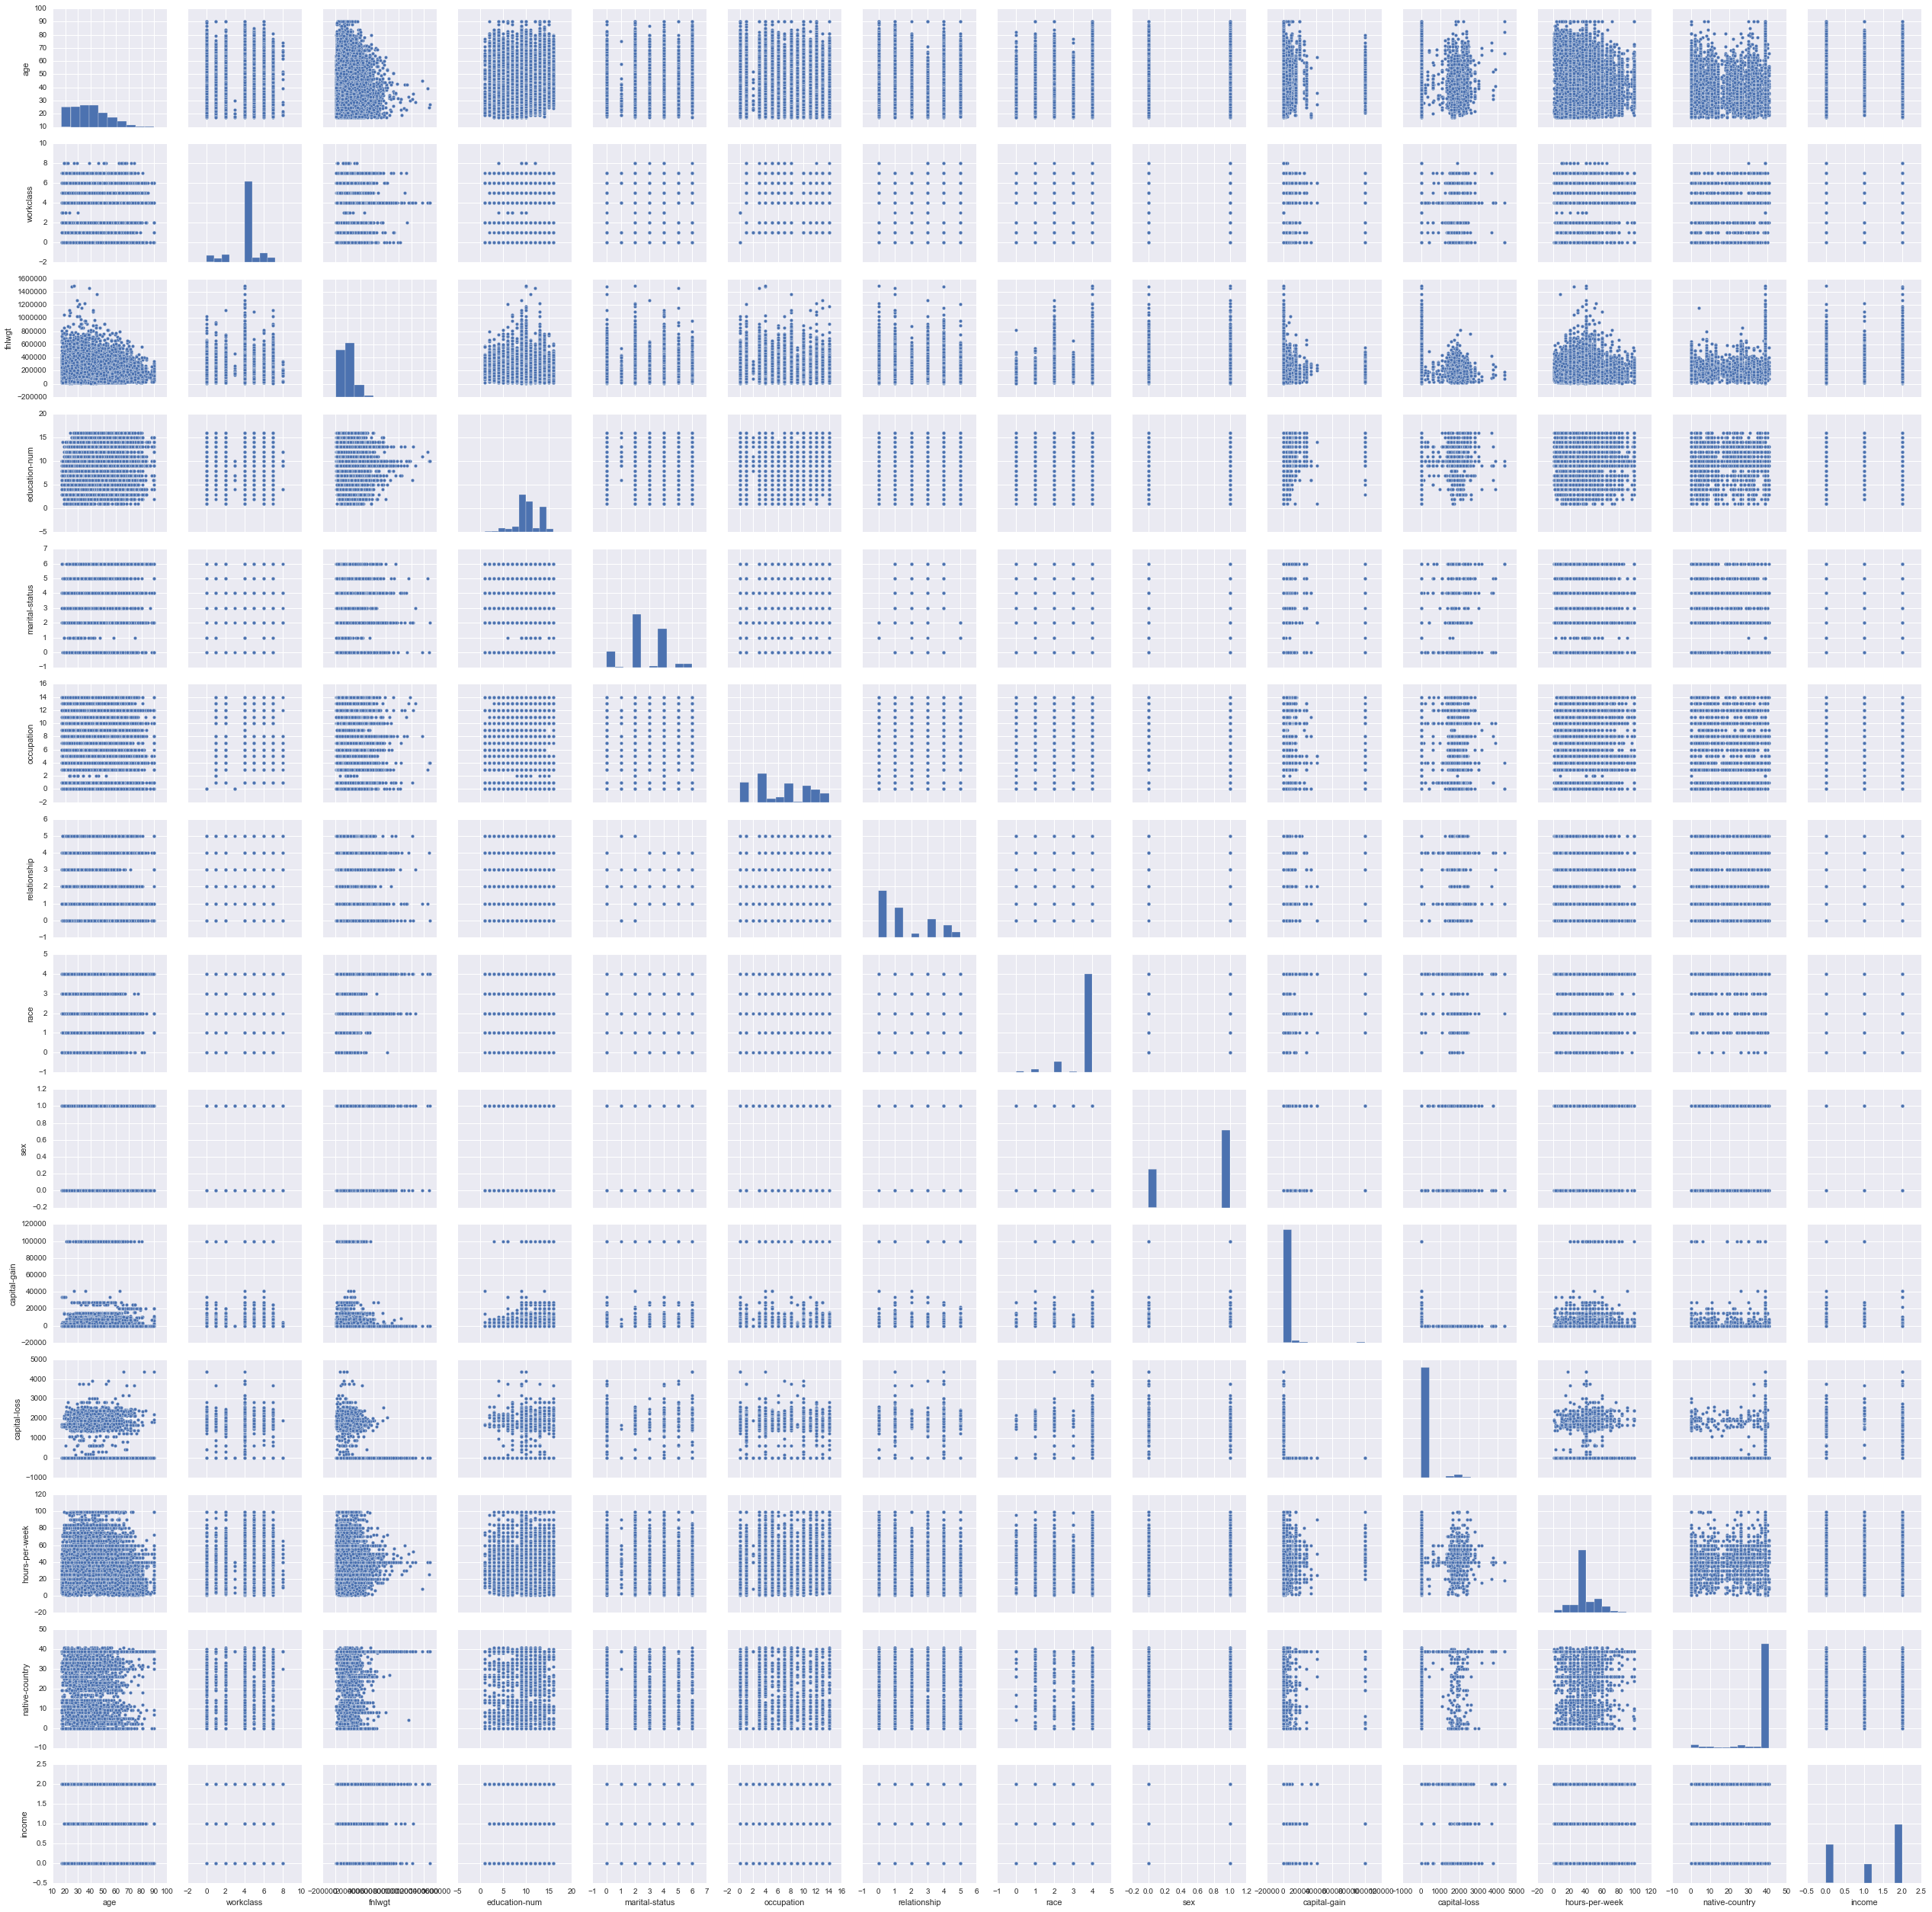

In [5]:
import seaborn as sns
sns.pairplot(df)

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

Check for NaN and Infinite Numbers - Our data is messy!

In [6]:
df = df.dropna()

In [7]:
matrix = df.as_matrix()

In [8]:
matrix = df.loc[100:,["age","income"]].as_matrix()

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [9]:
k  = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df.loc[:,["age","income"]])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Get the labels and centroids

In [10]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels
print centroids

[0 1 0 ..., 0 1 0]
[[ 29.12444553   1.22762041]
 [ 52.12844491   1.09509673]]


Compute the Silhoutte Score to measure your analysis

In [ ]:
matrix = df.loc[100:,["age","income"]].as_matrix()

In [ ]:
metrics.silhouette_score(matrix, labels, metric="euclidean")